In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase 17: Respuesta de vibración libre de un sistema de dos grados de libertad </h1>
<h3 style="text-align:center">ACUS262: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones">https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>
    
> + Métodos numéricos tales como los métodos de elementos finitos, son usados comunmente para analizar por ejemplo, sistemas vibratorios como máquinas o estructuras en sus formas reales. 
> + El inconveniente de este tipo de métodos es que son muy largos, complicados y se obtiene mucha información que por lo general no se requiere. 

<p style="text-align:center">
	<img src="modelo1.png" alt="MDOFCT" width=25%/></a><br>
    <strong> Figura 1: Modelo usado para el análisis de un sistema vibratorio.</strong>
</p>

> + En la Figura 2, se supone que la inercia del edificio está concentrada como tres masas puntuales ubicadas en los niveles de suelo, mientras que las elasticidades de las columnas se reemplzan por resortes. 

<p style="text-align:center">
	<img src="modelo4.png" alt="MDOFCT" width=40%/></a><br>
    <strong> Figura 2: Modelo usado para el análisis de un sistema vibratorio.</strong>
</p>

> + Formas idealizadas de los modos 1, 2 y 3 de un edificio sometido a fuerzas laterales (ver en: http://www.ce.memphis.edu/7119/PDFs/FEAM_Notes/Rev-Topic04-StructuralDynamicsofMDOFSystemsNotes.pdf)

<p style="text-align:center">
	<img src="modelo7.png" alt="MDOFCT" width=40%/></a><br>
    <strong> Figura 3: Formas idealizadas de los modos 1, 2 y 3 de un edificio.</strong>
</p>    

### Ejemplo:

> + Un sistema como el de la Figura 1, tiene $m_{1}=m_{2}= m$, $k_{1}=k_{2}= k$. Se pide determinar la respuesta total del sistema para las condiciones iniciales $v_{0}=\left[0\,\,0 \right]^{T}$ y los siguientes desplazamientos: $x_{0}=\left[-1\,\,1 \right]^{T},$ $x_{0}=\left[1\,\,1 \right]^{T},$ y $x_{0}=\left[-1\,\,2 \right]^{T}.$

<p style="text-align:center">
	<img src="eje.png" alt="MDOFCT" width=30%/></a><br>
    <strong> Figura 4: Vibración libre de un sistema de dos grados de libertad fijo a ambos extremos.</strong>
</p>

> + En este notebook vamos a demostrar el problema de valores propios del sistema que fue resuelto la clase anterior (Clase_17).

> + Esta técnica se aplica para matrices de mayor número de grados de libertad.

In [2]:
# Importo funciones: 
from IPython.display import Image
import numpy as np
from scipy import linalg as LA
import sympy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  
sp.init_printing()



In [3]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, k3]
    """
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, k3 = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot')
    sysODE = [x1_dot,
             (-(k1+k2)*x1 + k2*x2) / m1,
             x2_dot,
             (k2*x1 - (k2+k3)*x2) / m2]
    
    return sysODE

In [4]:
# Para que los plots sean mostrados en la celda, y no en una celda separada:
%matplotlib inline

In [5]:
# Para mejorar la representación de arreglos NumPy:
np.set_printoptions(precision=3, suppress=True)

# Ejemplo:
np.array([np.pi])

array([3.142])

### 1) Uso de [SymPy](http://sympy.org), para resolver simbólicamente valores y vectores propios. 

In [6]:
# Defino los símbolos:
m1, m2, k1, k2, k3 = sp.symbols('m1 m2 k1 k2 k3')
w, w1, w2          = sp.symbols('omega omega1 omega2')
u11, u21           = sp.symbols('u11 u21')
u12, u22           = sp.symbols('u12 u22')
M                  = sp.Matrix([[m1, 0],
                                [0,  m2]])

K                  = sp.Matrix([[k1 + k2, -k2],
                                [-k2,      k2 + k3]])


> + Creamos la matriz que vimos en nuestra Clase:

$$
\begin{align*}
\left(-\omega_{i}^{2}\text{M}+\text{K}\right)\,{\bf{u}}_{i} &=0
\end{align*}
$$

> + para ${\bf{u}}$. Este es el problema de valores propios.

### Valores propios:

In [7]:
# Creamos la matriz a resolver:
matwMK         = - w**2 * M + K

valorespropios = sp.solve(matwMK.det(), w**2)

### En SymPy, la forma más sencilla de printear una salida es llamándola en su propia celda:

In [8]:
# Definimos los valores para los parámetros:
m   = 1.0
m_1 = m
m_2 = m

k   = 4.0
k_1 = k
k_2 = k
k_3 = k


In [9]:
valorespropios[0].subs([(m1, m_1), (m2, m_2), (k1, k_1), (k2, k_2), (k3, k_3)])

In [10]:
valorespropios[1].subs([(m1, m_1), (m2, m_2), (k1, k_1), (k2, k_2), (k3, k_3)])

> + Vemos que los valores propios simbólicos encontrados se ajustan a los que nosotros encontramos numéricamente. 


### Ahora, los vectores propios:

In [11]:
matwMK1 = K - valorespropios[0] * M
matwMK2 = K - valorespropios[1] * M

U1      = sp.Matrix([[u11], 
                        [u21]])

U2      = sp.Matrix([[u12], 
                        [u22]])

In [12]:
vectorpropio1 = sp.solve(matwMK1 * U1, (u11, u21))
vectorpropio2 = sp.solve(matwMK2 * U2, (u12, u22))

> + Debido a que nuestro sistema de ecuaciones es **linealmente dependiente**, SymPy devolverá uno de los valores en términos del otro, de forma similar a cómo resolvemos estos problemas a mano. Entonces, podemos ver la relación devuelta para generar el vector propio.

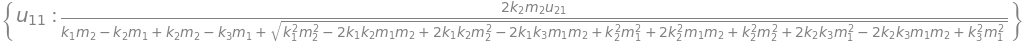

In [13]:
vectorpropio1

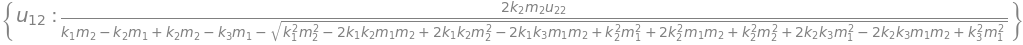

In [14]:
vectorpropio2

> + Nuevamente, si sustituimos los valores numéricos entonces podemos verificar la solución que obtenemos:

In [15]:
vectorpropio1[u11].subs([(m1, m_1), (m2, m_2), (k1, k_1), (k2, k_2), (k3, k_3)])

> + Podemos ver que $u_{11} = u_{21}$ para este vector propio 1, ajustándose a nuestra solución numérica.

In [16]:
vectorpropio2[u12].subs([(m1, m_1), (m2, m_2), (k1, k_1), (k2, k_2), (k3, k_3)])

> + Nuevamente, vemos que $u_{12} = - u_{22}$ para este vector propio 2, ajustándose a nuestra solución numérica.

### 2) Uso de [Scipy](https://www.scipy.org/), con Álgebra Lineal:

In [17]:
# Definimos las matrices:
M = np.asarray([[m_1, 0],
                [0,  m_2]])

K = np.asarray([[k_1 + k_2, -k_2      ],
                [-k_2,      k_2 + k_3]])

In [18]:
# Encontramos los valores propios y los vectores propios:
scivalorespropios, scivectorespropios = LA.eig(K, M)

> + La función LA.eig nos retorna dos arrays: uno es el de los valores propios, y el otro el de los vectores propios.

> + Los valores propios son los cuadrados de las dos frecuencias naturales. 

> + Los vectores propios retornan **normalizados,** con cada columna del arreglo representando un vector propios.

In [19]:
print('\n')
print('Los valores propios resultantes son: {:.2f} and {:.2f}.'.format(scivalorespropios[0].real, scivalorespropios[1].real))
print('\n')
print('De tal manera que las dos frecuencias naturales son: {:.2f} rad/s and {:.2f} rad/s.'.format(np.sqrt(scivalorespropios[0].real), np.sqrt(scivalorespropios[1].real)))
print('\n')



Los valores propios resultantes son: 4.00 and 12.00.


De tal manera que las dos frecuencias naturales son: 2.00 rad/s and 3.46 rad/s.




In [20]:
print(scivectorespropios)
scivectorespropios[[0, 1]] = scivectorespropios[[1, 0]]
print('\n')
print(scivectorespropios)

[[ 0.707 -0.707]
 [ 0.707  0.707]]


[[ 0.707  0.707]
 [ 0.707 -0.707]]


In [21]:
print('\n')
print('El primer vector propio es:' + str(scivectorespropios[:,0]) + '.')
print('\n')
print('El segundo vector propio es: ' + str(scivectorespropios[:,1]) + '.')
print('\n')



El primer vector propio es:[0.707 0.707].


El segundo vector propio es: [ 0.707 -0.707].




### Respuestas totales del sistema

In [22]:
# Ordenamos por orden las frecuencias 
arg      = np.argsort(scivalorespropios)
values   = np.array(scivalorespropios.real)[arg]
vectors  = np.array(scivectorespropios)[arg]
values, vectors

(array([ 4., 12.]),
 array([[ 0.707,  0.707],
        [ 0.707, -0.707]]))

In [23]:
# Chequeamos ortogonalidad con respecto a M:
a = np.dot(np.dot(vectors, M), vectors.T)
a

array([[1., 0.],
       [0., 1.]])

In [24]:
# Construimos matriz de modos:
P = np.dot(vectors.T, LA.inv(np.sqrt(a)))
P

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [25]:
# Condiciones iniciales en coordenadas principales:
x0     = np.array([-1, 1])
dotx0  = np.array([0.00000000001, 0])
y0     = np.dot(P.T, np.dot(M, x0))
y0

array([ 0.   , -1.414])

In [26]:
# Respuesta en coordenadas principales:
t = sp.Symbol('t')
y = y0 * np.array([sp.sin(scivalorespropios[0] * t), sp.sin(scivalorespropios[1] * t)])
y

array([0, -1.4142135623731*sin(12.0*t)], dtype=object)

### Modo de vibrar condición Caso 1: Las dos masas se mueven exactamente opuestas entre sí en el segundo modo.

In [27]:
# Parámetros para la simulación: 

abserr     = 1.0e-9
relerr     = 1.0e-9
max_step   = 0.01
stoptime   = 10.0
numpoints  = 10001

t = np.linspace(0.0, stoptime, numpoints)

# Condiciones iniciales:
x1_init     = -1.0                       
x1_dot_init =  0.0                   
x2_init     =  1.0                   
x2_dot_init =  0.0                   

# array de parámetros:
p = [m_1, m_2, k_1, k_2, k_3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

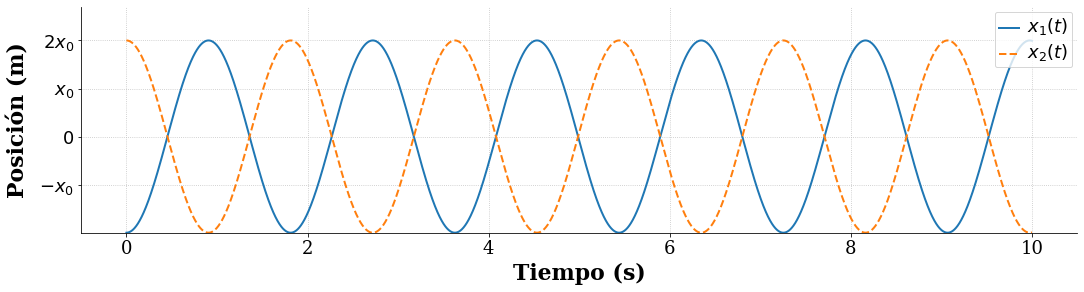

In [28]:
plt.figure(figsize=(15, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Tiempo (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Posición (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1(t)$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2(t)$')

plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

plt.tight_layout(pad=0.5)




### Modo de vibrar condición Caso 2: Las dos masas se mueven idénticamente en el modo 1

In [29]:
abserr     = 1.0e-9
relerr     = 1.0e-9
max_step   = 0.01
stoptime   = 10.0
numpoints  = 10001

t = np.linspace(0.0, stoptime, numpoints)

x1_init     =  1.0                      
x1_dot_init =  0.0                   
x2_init     =  1.0                   
x2_dot_init =  0.0                   

p = [m_1, m_2, k_1, k_2, k_3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

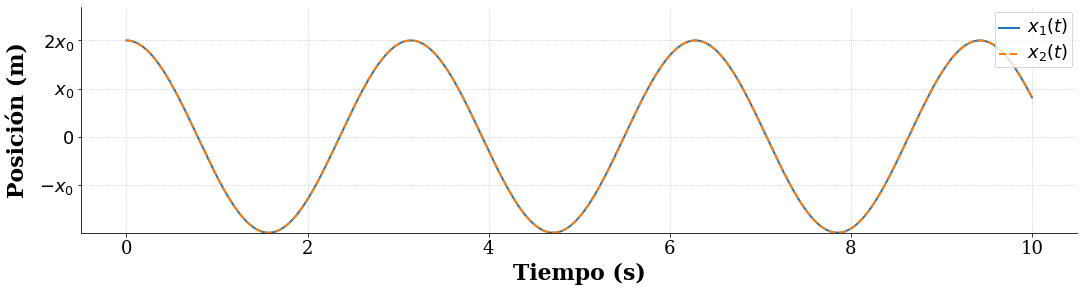

In [30]:
plt.figure(figsize=(15, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Tiempo (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Posición (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1(t)$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2(t)$')

plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

plt.tight_layout(pad=0.5)


### Modo de vibrar condición Caso 3: Las dos masas se mueven en ambos modos presentes

In [43]:
abserr     = 1.0e-9
relerr     = 1.0e-9
max_step   = 0.01
stoptime   = 10.0
numpoints  = 10001

t = np.linspace(0.0, stoptime, numpoints)

x1_init     =  -1.0                       
x1_dot_init =   0.0                   
x2_init     =   1.0                    
x2_dot_init =   2.0                   
 
p = [m_1, m_2, k_1, k_2, k_3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

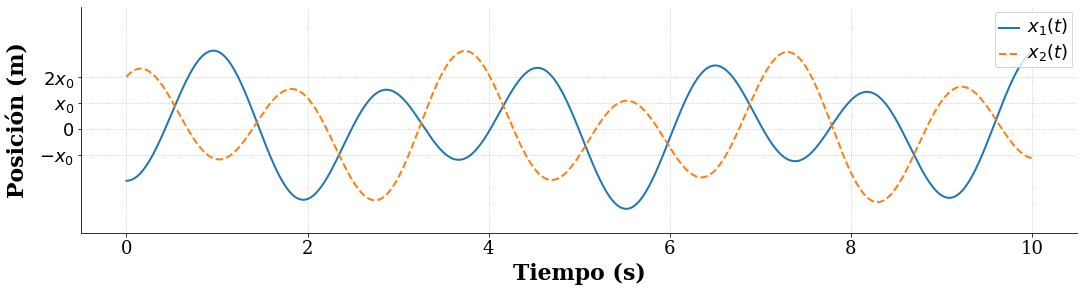

In [44]:
plt.figure(figsize=(15, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Tiempo (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Posición (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1(t)$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2(t)$')

plt.ylim(-2,2.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

plt.tight_layout(pad=0.5)

### Modo de vibrar condición Caso 4: 

In [45]:
abserr     = 1.0e-9
relerr     = 1.0e-9
max_step   = 0.01
stoptime   = 10.0
numpoints  = 10001

t = np.linspace(0.0, stoptime, numpoints)

x1_init     =  0.0                       
x1_dot_init =  0.0                   
x2_init     =  1.0                    
x2_dot_init =  0.0                   
 
p = [m_1, m_2, k_1, k_2, k_3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

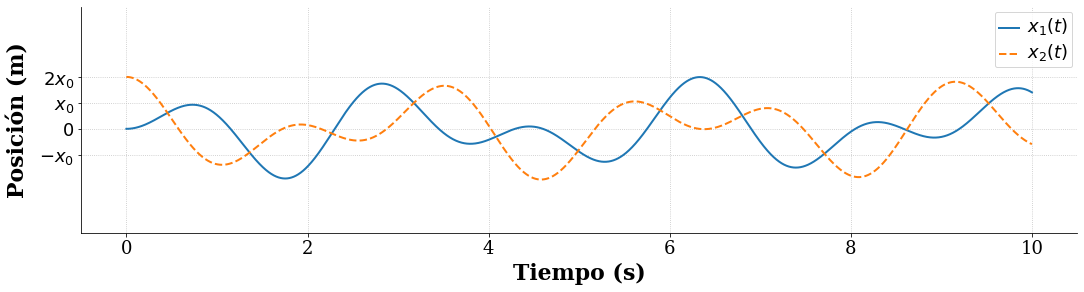

In [46]:
plt.figure(figsize=(15, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Tiempo (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Posición (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1(t)$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2(t)$')

plt.ylim(-2,2.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

plt.tight_layout(pad=0.5)